In [ ]:
 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [ ]:
# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

# YOUR CODE HERE
whale_returns_csv_path = Path("../Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls

# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

# YOUR CODE HERE
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

# YOUR CODE HERE
algo_returns_csv_path = Path("../Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls

# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [48]:
# Drop nulls

# YOUR CODE HERE
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices

# YOUR CODE HERE
sp500_history_csv_path = Path("../Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv_path,index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types

# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types

# YOUR CODE HERE
sp500_history["Close"] = sp500_history["Close"].str.replace("$", " ")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [13]:
sp_daily_returns = sp500_history.pct_change()
sp_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
# Drop nulls

# YOUR CODE HERE
sp_daily_returns.dropna(inplace=True)
sp_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [15]:
# Rename Column
# YOUR CODE HERE
sp_daily_returns.columns = ["S&P 500"]
sp_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_daily_returns = pd.concat([whale_returns, algo_returns, sp_daily_returns], axis="columns", join="inner")
combined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.00194213,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.0085888,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955048,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.00495674,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.00544705,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

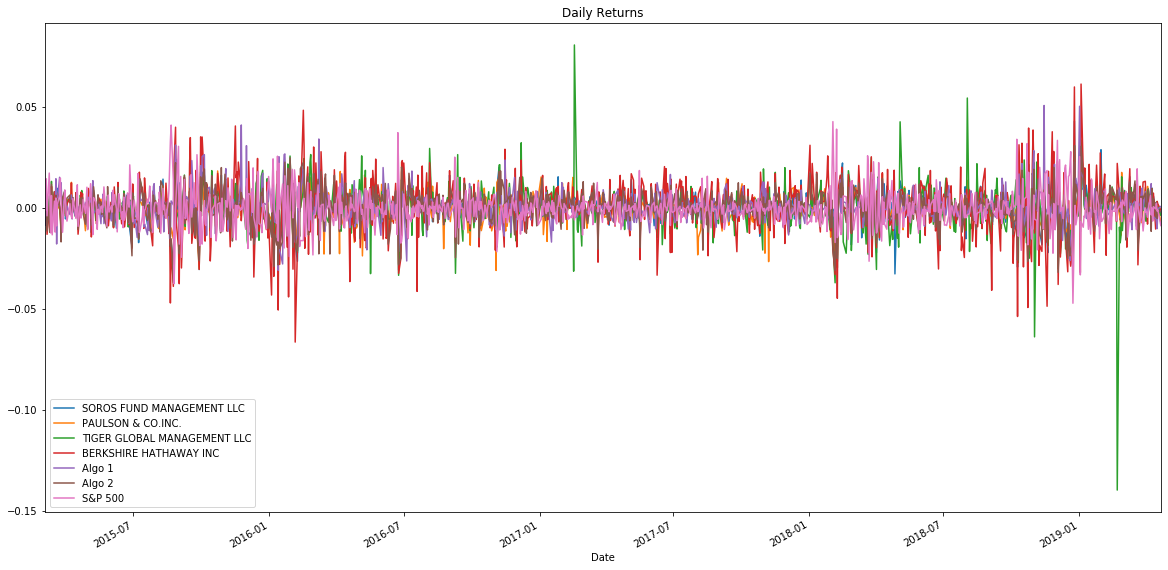

In [17]:
# Plot daily returns

# YOUR CODE HERE
combined_daily_returns.plot(figsize=(20,10), title='Daily Returns')

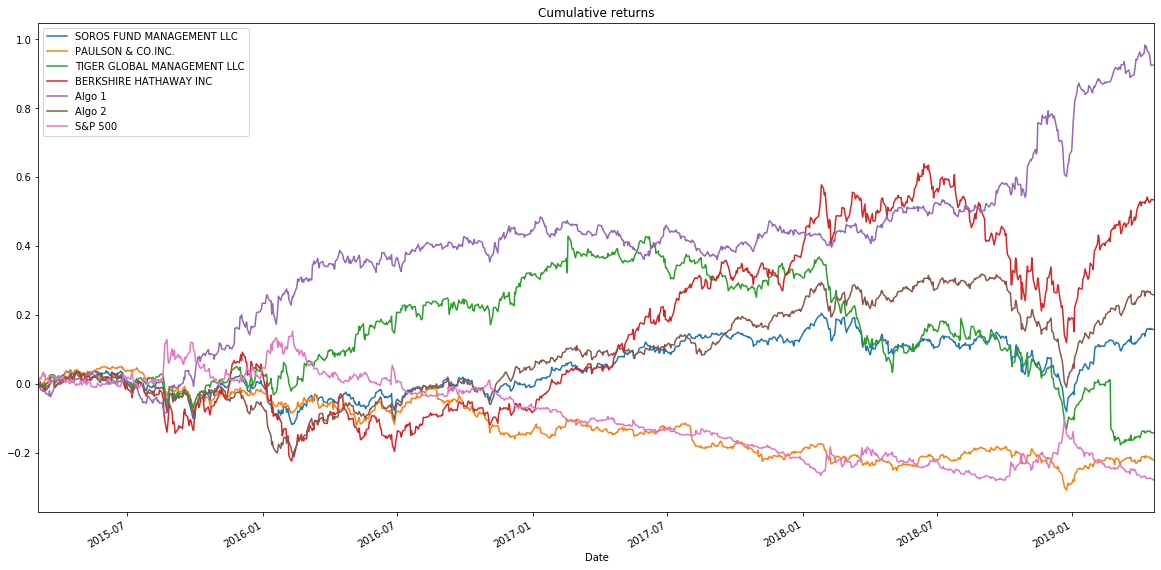

In [18]:
# Plot cumulative returns

# YOUR CODE HERE
cumulative_portfolio_returns = (1 + combined_daily_returns).cumprod() - 1
cumulative_portfolio_returns.plot(figsize=(20,10), title="Cumulative returns")

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

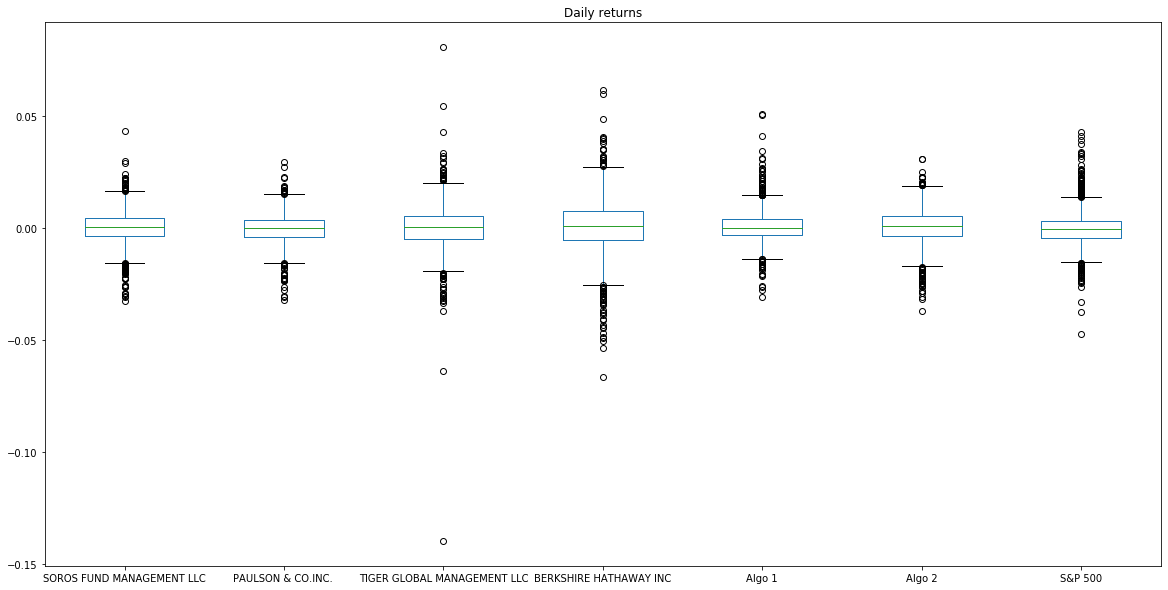

In [19]:
# Box plot to visually show risk

# YOUR CODE HERE
combined_daily_returns.plot.box(figsize=(20,10), title="Daily returns")

In [20]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_daily_returns.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

daily_std['S&P 500'] <  daily_std
# Tiger Global Management LLC & Bershire Hathaway Inc are riskier than the S&P 500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [22]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

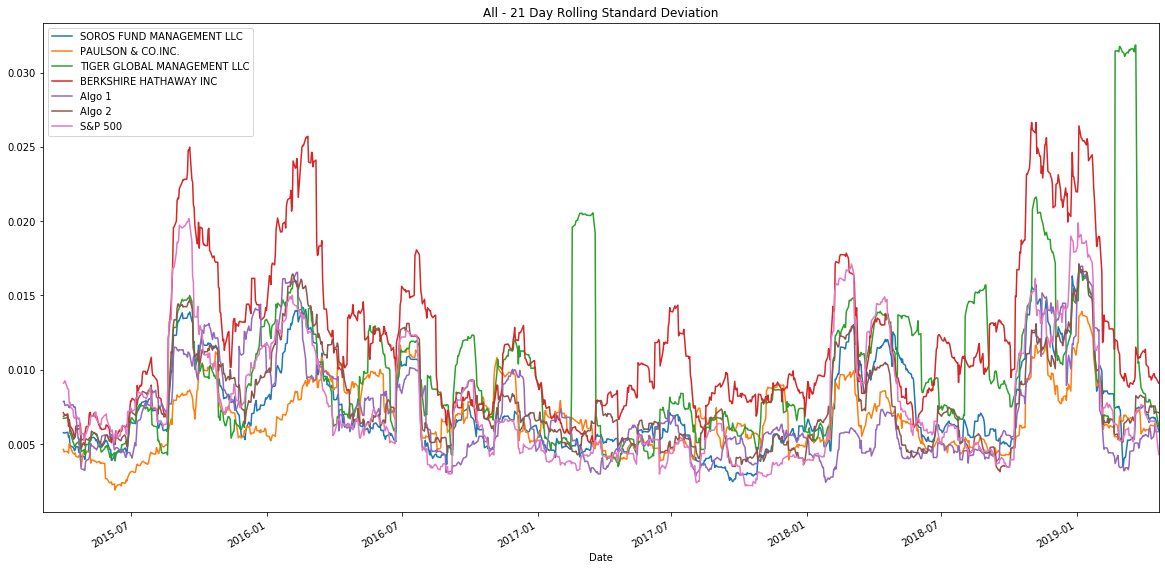

In [23]:
# Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
# YOUR CODE HERE
combined_daily_returns.rolling(window=21).std().plot(figsize=(20,10), title='All - 21 Day Rolling Standard Deviation')

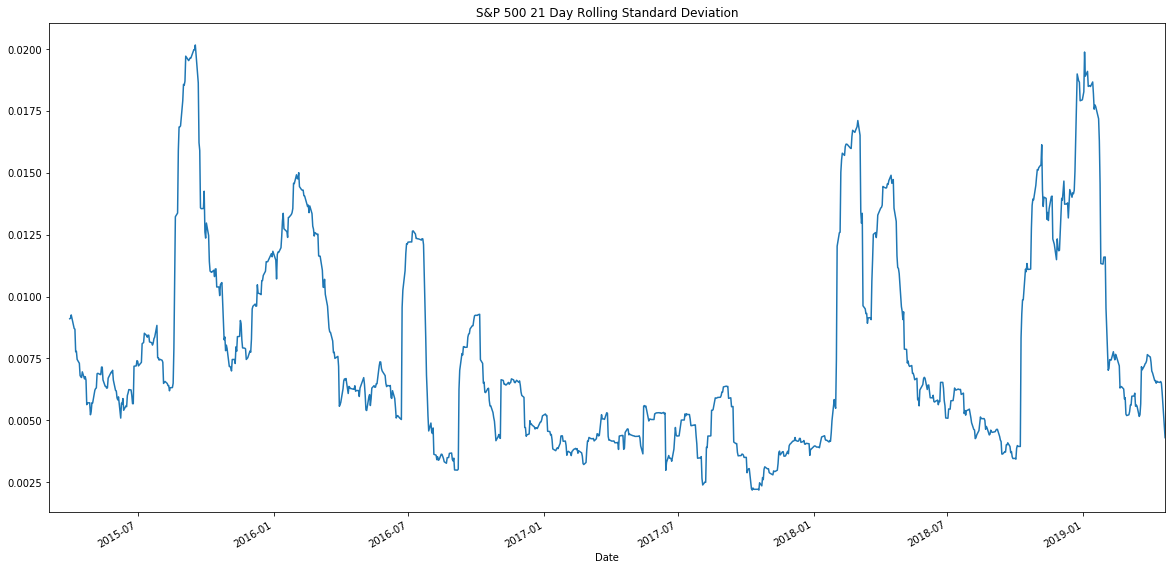

In [24]:
combined_daily_returns['S&P 500'].rolling(window=21).std().plot(figsize=(20,10), title='S&P 500 21 Day Rolling Standard Deviation')

In [25]:
# Correlation

# YOUR CODE HERE
correlation = combined_daily_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.687756,-0.013856
Algo 2,0.826730,0.678085,0.507160,0.687756,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.002192,1.000000


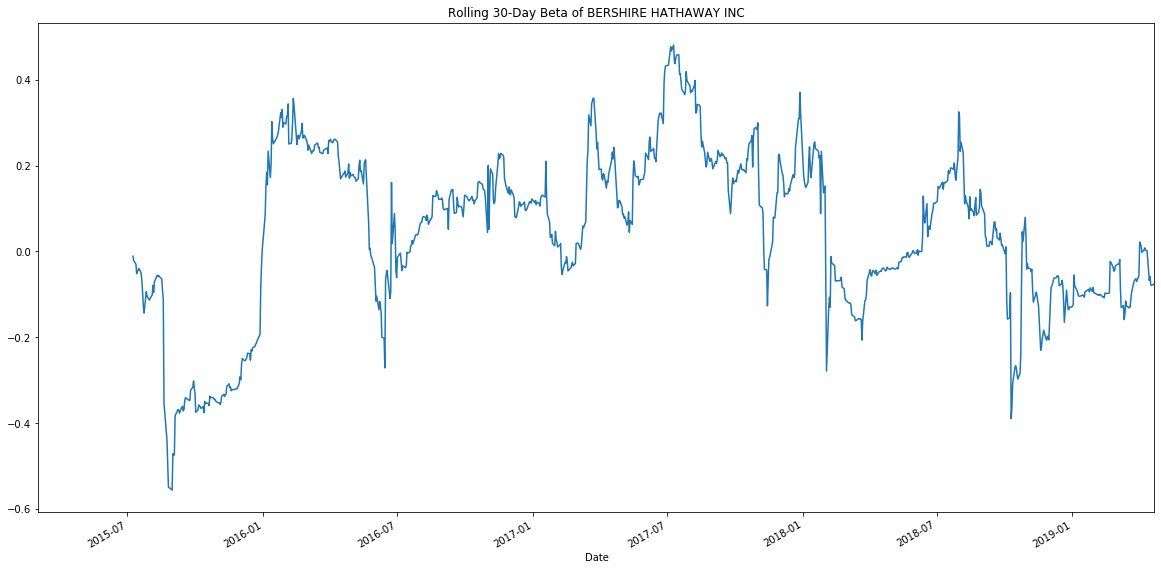

In [26]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

# Calculate covariance of all daily returns of BRK vs. S&P 500
rolling_covariance = combined_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=90).cov(combined_daily_returns['S&P 500'])
rolling_covariance

# Calculate rolling variance of S&P 500 Returns
rolling_variance = combined_daily_returns['S&P 500'].rolling(window=90).var()
rolling_variance

# Calculate rolling beta and plot
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of BERSHIRE HATHAWAY INC')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [27]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [28]:
# Annualzied Sharpe Ratios

# YOUR CODE HERE
sharpe_ratios = (combined_daily_returns.mean() * 252) / (combined_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

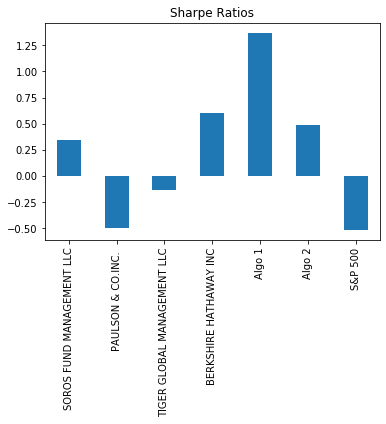

In [29]:
# Visualize the sharpe ratios as a bar plot

# YOUR CODE HERE
sharpe_ratios.plot.bar(title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Read the first stock
# YOUR CODE HERE
goog_csv_path = Path("../Resources/goog_historical.csv")
goog_csv = pd.read_csv(goog_csv_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [31]:
# Read the second stock
# YOUR CODE HERE
aapl_csv_path = Path("../Resources/aapl_historical.csv")
aapl_csv = pd.read_csv(aapl_csv_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [32]:
# Read the third stock

# YOUR CODE HERE
cost_csv_path = Path("../Resources/cost_historical.csv")
cost_csv = pd.read_csv(cost_csv_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [33]:
# Concatenate all stocks into a single DataFrame

# YOUR CODE HERE
combined_stocks = pd.concat([goog_csv, aapl_csv, cost_csv], axis="rows", join="inner")
combined_stocks.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [34]:
# Reset the index
# YOUR CODE HERE
combined_stocks.reset_index(inplace=True)
combined_stocks.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [58]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the values are the closing prices
# YOUR CODE HERE
combined_stocks_pvt = combined_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
combined_stocks_pvt.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [60]:
# Calculate portfolio returns

# YOUR CODE HERE
combined_stocks_returns = combined_stocks_pvt.pct_change().dropna()
combined_stocks_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [61]:
# Calculate weighted portfolio returns
# Shortcut to calculate weighted portfolio returns

# YOUR CODE HERE
weights = [1/3, 1/3, 1/3]
portfolio_returns = combined_stocks_returns.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [64]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
new_portfolio_with_custom = pd.concat([combined_daily_returns, portfolio_returns], axis='columns', join='inner')
new_portfolio_with_custom.columns=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC','Algo 1','Algo 2', 'S&P 500', 'Custom']
new_portfolio_with_custom.sort_index(ascending=False).head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000676563,-0.001936,-0.008764,0.001217
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000587916,-0.001229,-0.001011,0.001545
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.0069447,0.002899,0.002279,0.000340
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.00433126,-0.004572,-0.000509,0.007522


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [65]:
# Risk 
# YOUR CODE HERE
new_daily_std = new_portfolio_with_custom.std()
new_annualized_std = new_daily_std * np.sqrt(252)
new_annualized_std

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
Custom                         0.211627
dtype: float64

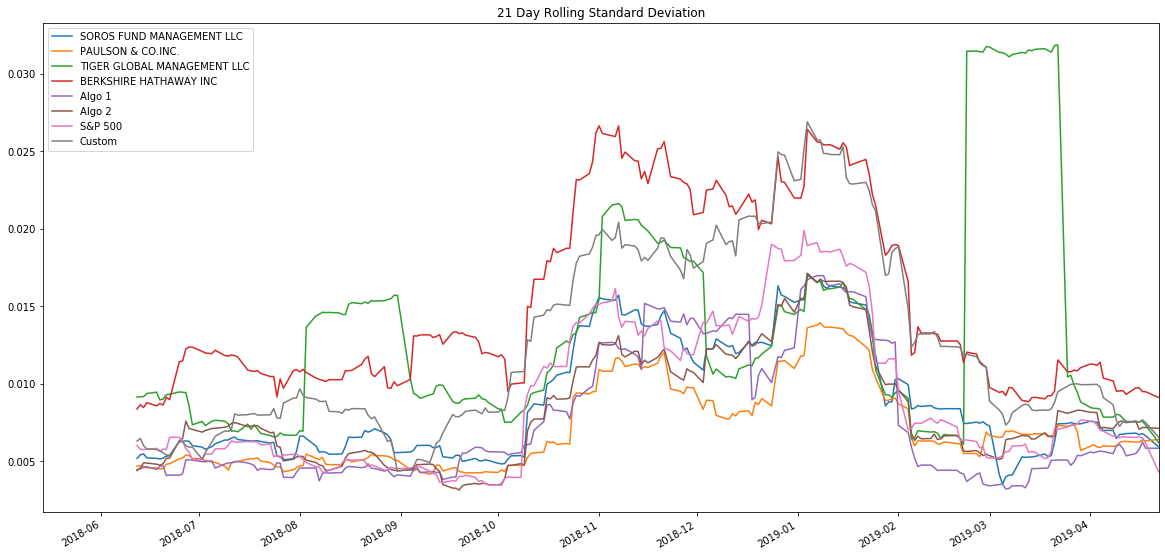

In [66]:
# Rolling
# YOUR CODE HERE
new_portfolio_with_custom.rolling(window=21).std().plot(figsize=(20,10), title='21 Day Rolling Standard Deviation')

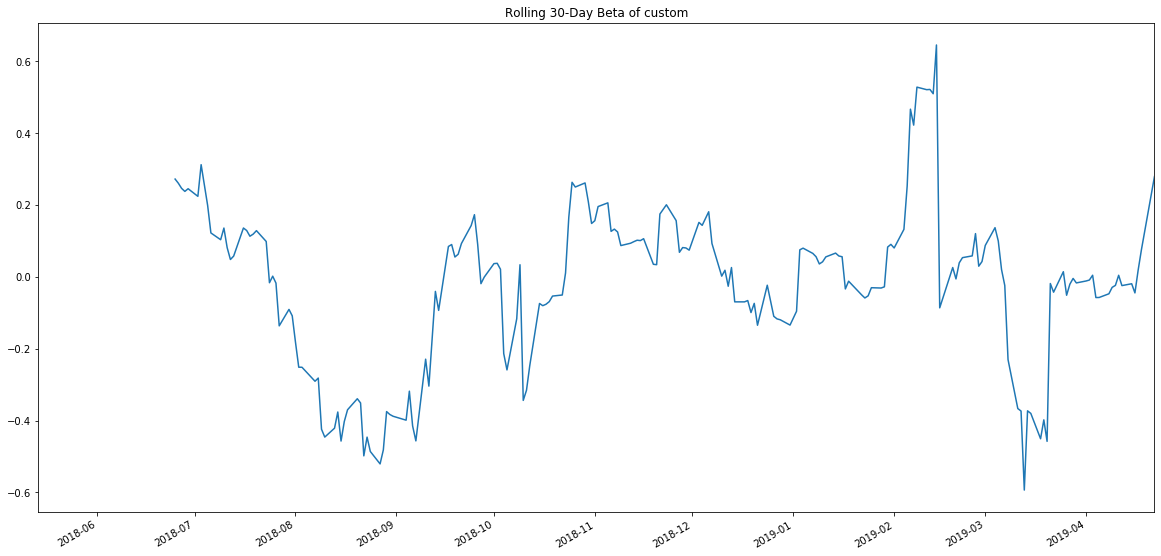

In [72]:
# Beta
# YOUR CODE HERE

covariance_2 = new_portfolio_with_custom['Custom'].cov(new_portfolio_with_custom['S&P 500'])
covariance_2
variance_2 = new_portfolio_with_custom['S&P 500'].var()
variance_2
custom_beta = covariance_2 / variance_2
custom_beta
rolling_covariance_2 = new_portfolio_with_custom['Custom'].rolling(window=30).cov(new_portfolio_with_custom['S&P 500'])
rolling_variance_2 = new_portfolio_with_custom['S&P 500'].rolling(window=30).var()
rolling_beta_2 = rolling_covariance_2 / rolling_variance_2
rolling_beta_2.plot(figsize=(20, 10), title='Rolling 30-Day Beta of custom')

In [43]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [73]:
sharpe_ratios2 = (new_portfolio_with_custom.mean() * 252) / (new_portfolio_with_custom.std() * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
Custom                         0.876152
dtype: float64

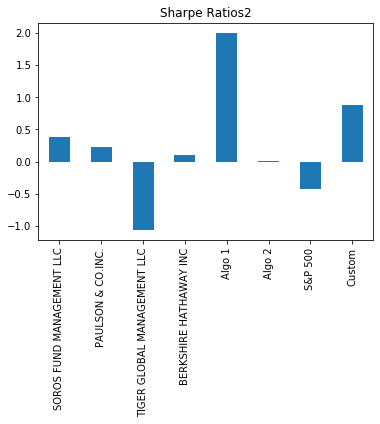

In [74]:
# Visualize the sharpe ratios as a bar plot

# YOUR CODE HERE
sharpe_ratios2.plot.bar(title="Sharpe Ratios2")

## Include correlation analysis to determine which stocks (if any) are correlated

In [75]:
# YOUR CODE HERE
correlation2 = new_portfolio_with_custom.corr()
correlation2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.782054,-0.038832,0.800558
Algo 2,0.862583,0.783865,0.408402,0.782054,1.000000,-0.042540,0.739020
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.042540,1.000000,0.005603
Custom,0.732548,0.643828,0.390961,0.800558,0.739020,0.005603,1.000000
